In [15]:
# 필요 라이브러리 임포트 및 자료 가져오기

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

train_df_cleaned = pd.read_csv('./house_prediction/train.csv')
test_df = pd.read_csv('./house_prediction/test.csv')


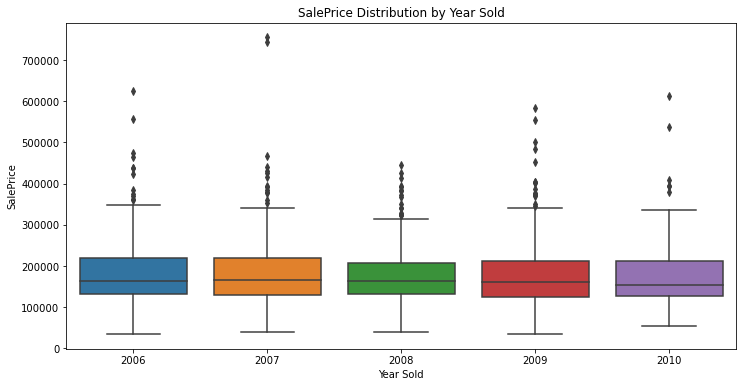

In [5]:
# 연을 기준으로 매매된 주택 가격 박스 플롯으로 시각화

plt.figure(figsize=(12, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df_cleaned)
plt.title('SalePrice Distribution by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()


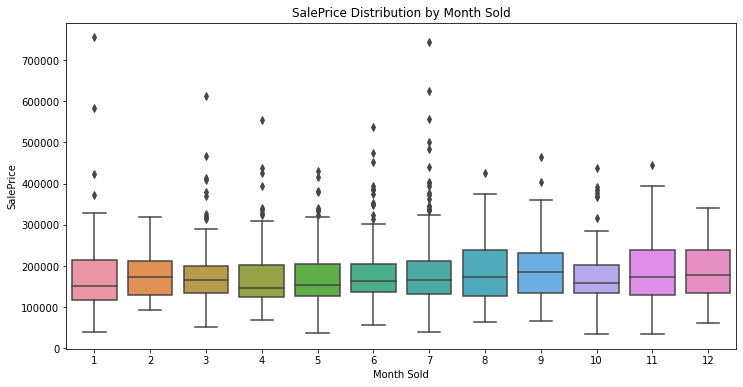

In [6]:
# 월을 기준으로 매매된 주택 가격 박스 플롯으로 시각화

plt.figure(figsize=(12, 6))
sns.boxplot(x='MoSold', y='SalePrice', data=train_df_cleaned)
plt.title('SalePrice Distribution by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('SalePrice')
plt.show()


In [7]:
# 판매 타입과 판매 조건을 상관관계 분석위해 인코딩

train_df_encoded = train_df_cleaned.copy()
train_df_encoded['SaleType'] = train_df_encoded['SaleType'].astype('category').cat.codes
train_df_encoded['SaleCondition'] = train_df_encoded['SaleCondition'].astype('category').cat.codes

In [8]:
# 상관관계 분석

transaction_features = ['SalePrice', 'YrSold', 'MoSold', 'SaleType', 'SaleCondition']
transaction_corr = train_df_encoded[transaction_features].corr()

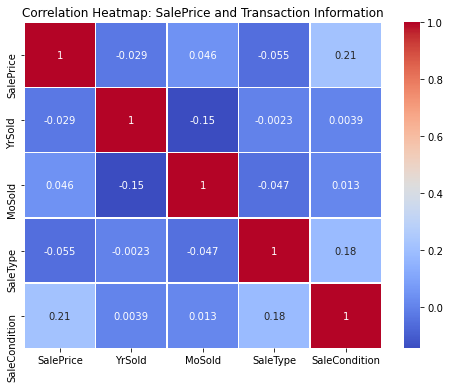

In [9]:
# 상관관계 히트맵 분석
plt.figure(figsize=(8, 6))
sns.heatmap(transaction_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: SalePrice and Transaction Information')
plt.show()

In [10]:
# 시계열 자료로 모델링

X_transaction = train_df_encoded[['YrSold', 'MoSold', 'SaleType', 'SaleCondition']]
y = train_df_encoded['SalePrice']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train-test split
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_transaction, y, test_size=0.2, random_state=42)


In [13]:

# Linear Regression model
model_ts = LinearRegression()
model_ts.fit(X_train_ts, y_train_ts)


LinearRegression()

In [16]:
# Predictions and performance
y_pred_ts = model_ts.predict(X_val_ts)
rmse_ts = np.sqrt(mean_squared_error(y_val_ts, y_pred_ts))

transaction_corr, rmse_ts

(               SalePrice    YrSold    MoSold  SaleType  SaleCondition
 SalePrice       1.000000 -0.028923  0.046432 -0.054911       0.213092
 YrSold         -0.028923  1.000000 -0.145721 -0.002327       0.003880
 MoSold          0.046432 -0.145721  1.000000 -0.047386       0.013320
 SaleType       -0.054911 -0.002327 -0.047386  1.000000       0.184067
 SaleCondition   0.213092  0.003880  0.013320  0.184067       1.000000,
 83714.86084427)

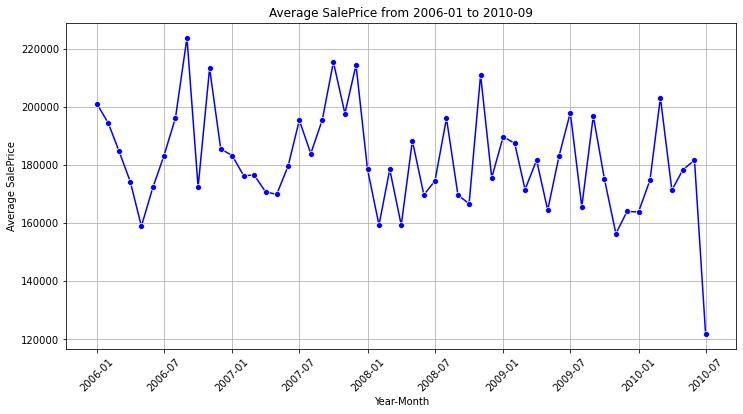

In [25]:
# 연월 피처 새로 만들기.
train_df_cleaned['YearMonth'] = train_df_cleaned['YrSold'].astype(str) + '-' + train_df_cleaned['MoSold'].astype(str).str.zfill(2)

# 연월 정보를 시계열 정보로 변환
train_df_cleaned['YearMonth'] = pd.to_datetime(train_df_cleaned['YearMonth'], format='%Y-%m')

# 연월을 묶어서 평균 가격으로 표현하기.
year_month_avg_price = train_df_cleaned.groupby('YearMonth')['SalePrice'].mean()

# 시계열 자료 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_month_avg_price.index, y=year_month_avg_price.values, marker='o', color='b')
plt.title('Average SalePrice from 2006-01 to 2010-09')
plt.xlabel('Year-Month')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [30]:
# Preparing the data for linear regression with the YearMonth feature
# Extracting numerical features from YearMonth (year and month)
train_df_cleaned['Year'] = train_df_cleaned['YearMonth'].dt.year
train_df_cleaned['Month'] = train_df_cleaned['YearMonth'].dt.month


In [31]:
train_df_cleaned.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearMonth,Year,Month
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,2008-02-01,2008,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,2007-05-01,2007,5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,2008-09-01,2008,9
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01,2006,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,2008-12-01,2008,12


In [38]:
#선형회귀 시계열 피처 선택
X_time_series = train_df_cleaned[['Year', 'Month']]
y_time_series = train_df_cleaned['SalePrice']

In [33]:
# 테스트 데이터 분리 
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_time_series, y_time_series, test_size=0.2, random_state=42)

In [34]:
# 선형회귀 
model_time_series = LinearRegression()
model_time_series.fit(X_train_ts, y_train_ts)

LinearRegression()

In [39]:
# 예측 및 퍼포먼스 평가

y_pred_ts = model_time_series.predict(X_val_ts)
rmse_time_series = np.sqrt(mean_squared_error(y_val_ts, y_pred_ts))
rmse_time_series

87451.03157874306